In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style

In [20]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Paths

In [21]:
REPORTS_PATH = "./../reports"
CSV_PATH = os.path.join(REPORTS_PATH, "model_results.csv")

# Load evaluation results

In [22]:
df = pd.read_csv(CSV_PATH)
df.head()

,Feature,Model,Accuracy,ErrorRate,Pos_Precision,Neg_Precision,Pos_Recall,Neg_Recall,Pos_F1,Neg_F1,Weighted_F1
0,tfidf_word_2gram,NaiveBayes,0.658333,0.341667,0.777778,0.600000,0.875,0.750,0.823529,0.666667,0.637601
1,tfidf_word_3gram,NaiveBayes,0.404167,0.595833,0.545455,0.416667,0.750,0.625,0.631579,0.500000,0.383901
2,tfidf_word_1gram,NaiveBayes,0.841667,0.158333,0.700000,0.777778,0.875,0.875,0.777778,0.823529,0.837589
3,tfidf_word_3gram,SVM,0.141667,0.858333,0.800000,0.333333,0.500,0.125,0.615385,0.181818,0.160341
4,tfidf_word_2gram,DecisionTree,0.187500,0.812500,0.285714,0.200000,0.250,0.125,0.266667,0.153846,0.171448


# 1. Accuracy & Error Rate by Model and Feature

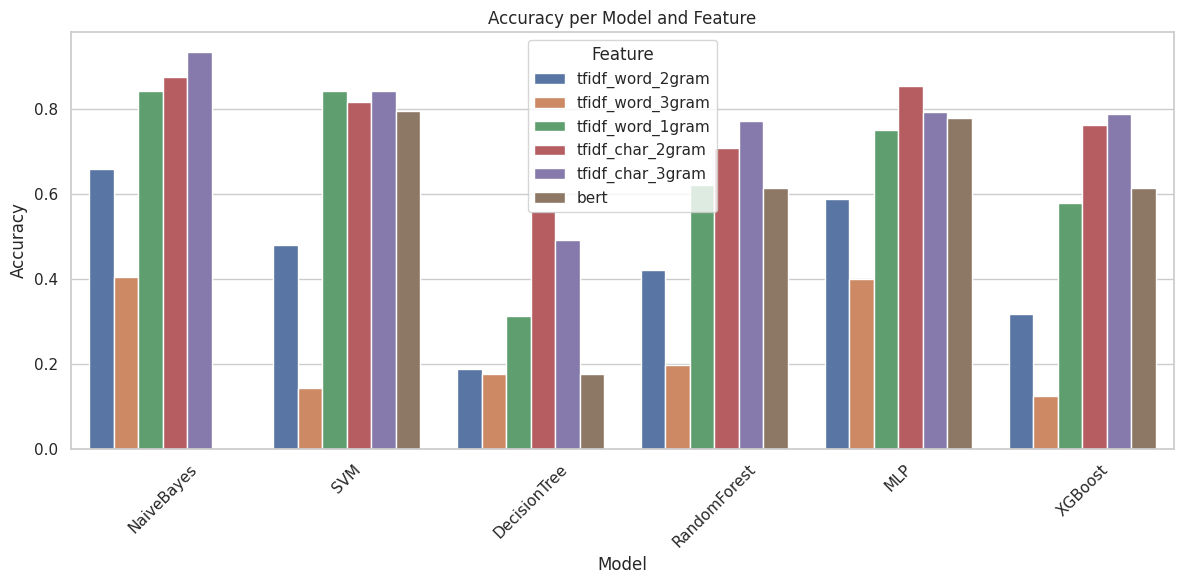

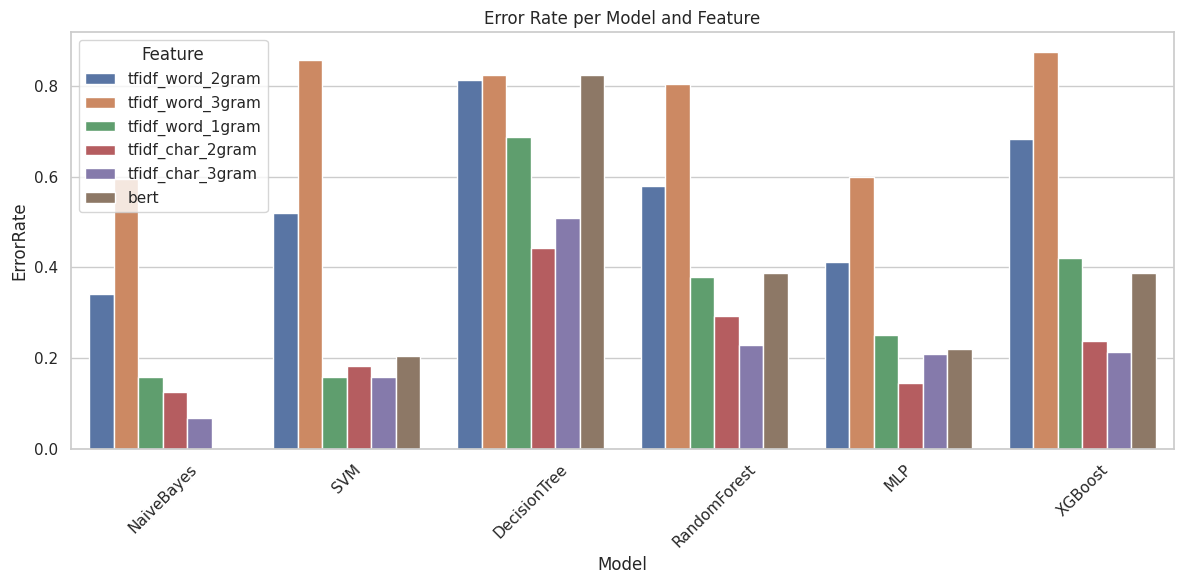

In [23]:
# Accuracy comparison
plt.figure()
sns.barplot(data=df, x="Model", y="Accuracy", hue="Feature")
plt.title("Accuracy per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/accuracy_per_model.png")
plt.show()

# Error rate comparison
plt.figure()
sns.barplot(data=df, x="Model", y="ErrorRate", hue="Feature")
plt.title("Error Rate per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/error_rate_per_model.png")
plt.show()


# 2. Weighted F1-Score

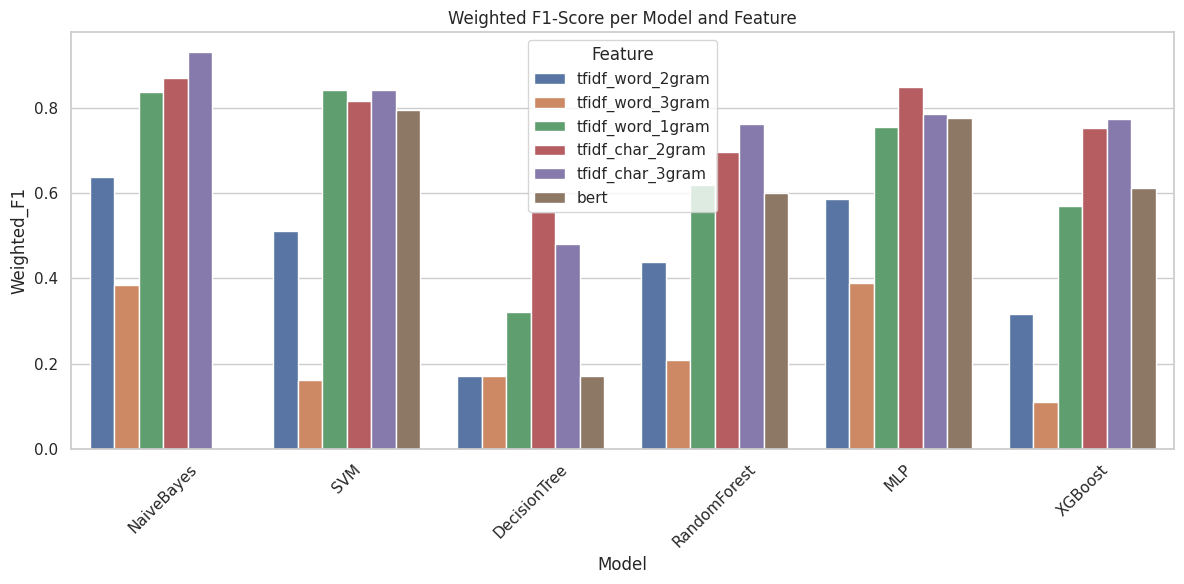

In [24]:
plt.figure()
sns.barplot(data=df, x="Model", y="Weighted_F1", hue="Feature")
plt.title("Weighted F1-Score per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/weighted_f1_per_model.png")
plt.show()


# 3. Per-Class Precision

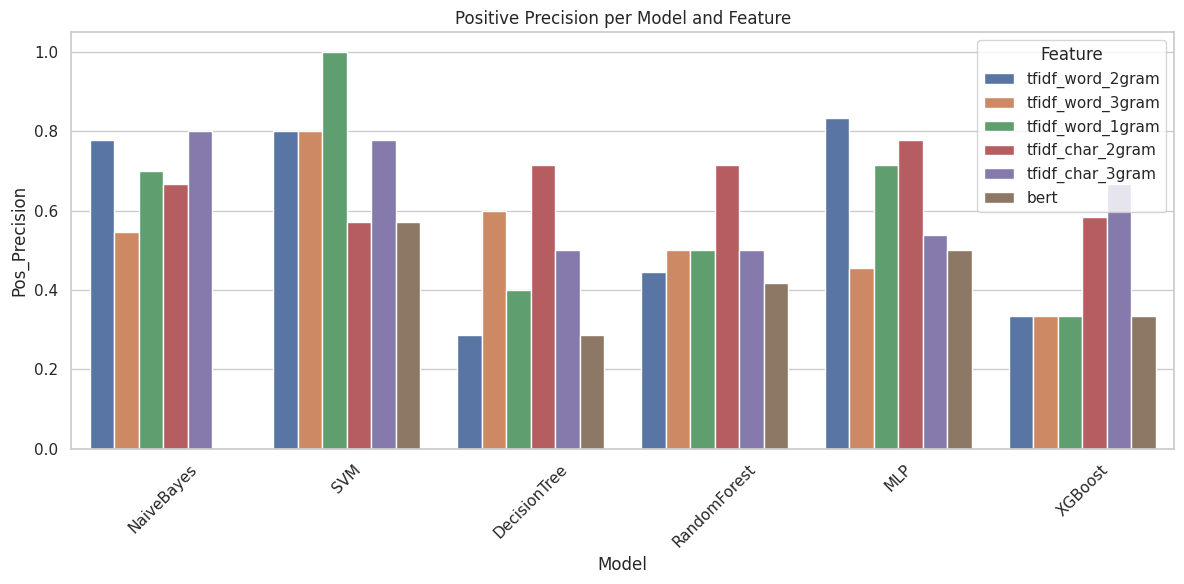

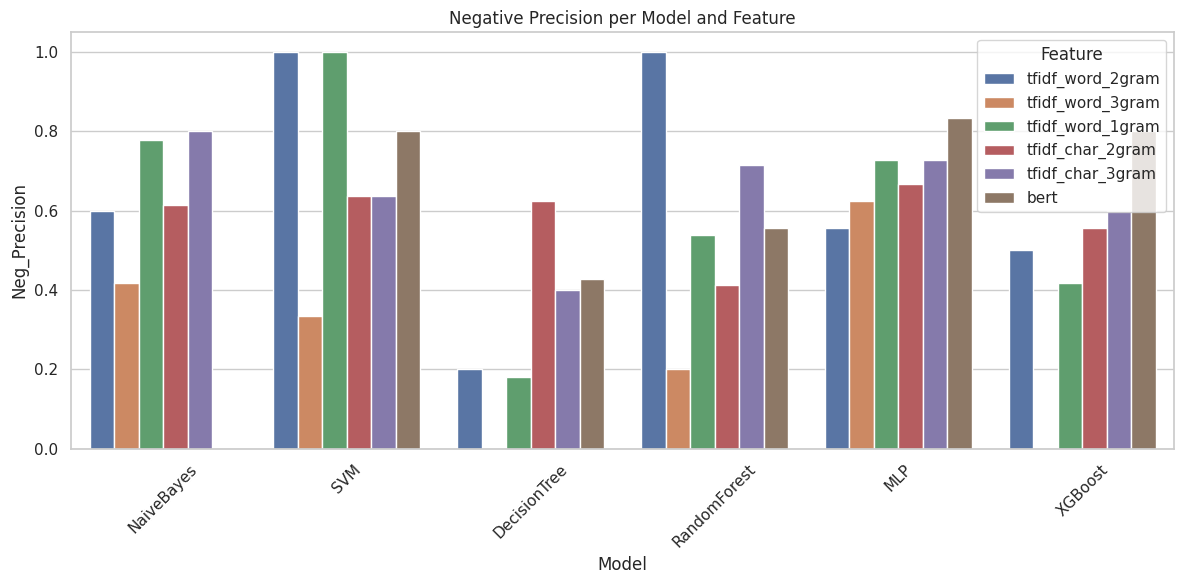

In [25]:
# Positive precision
plt.figure()
sns.barplot(data=df, x="Model", y="Pos_Precision", hue="Feature")
plt.title("Positive Precision per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/positive_precision.png")
plt.show()

# Negative precision
plt.figure()
sns.barplot(data=df, x="Model", y="Neg_Precision", hue="Feature")
plt.title("Negative Precision per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/negative_precision.png")
plt.show()


# 4. Per-Class Recall

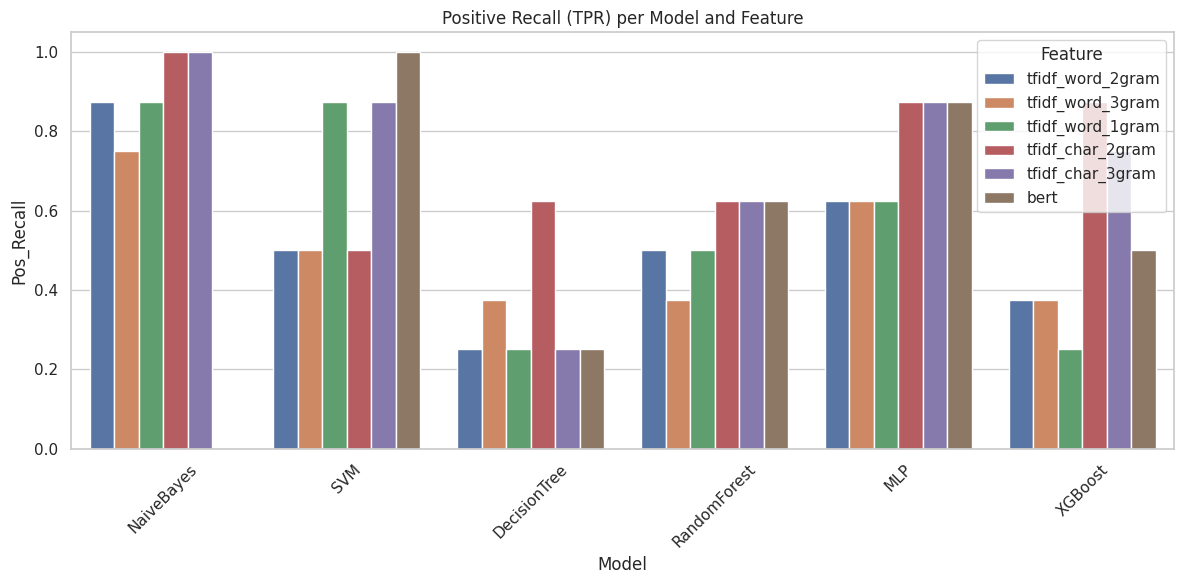

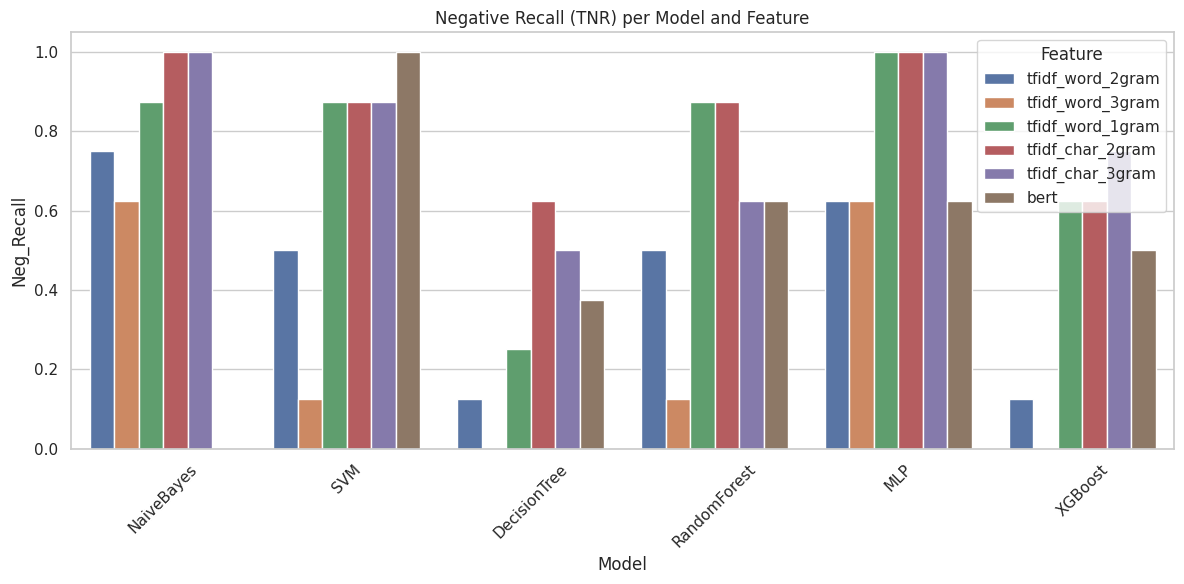

In [26]:
# Positive recall
plt.figure()
sns.barplot(data=df, x="Model", y="Pos_Recall", hue="Feature")
plt.title("Positive Recall (TPR) per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/positive_recall.png")
plt.show()

# Negative recall
plt.figure()
sns.barplot(data=df, x="Model", y="Neg_Recall", hue="Feature")
plt.title("Negative Recall (TNR) per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/negative_recall.png")
plt.show()


# 5. Per-Class F1-Score

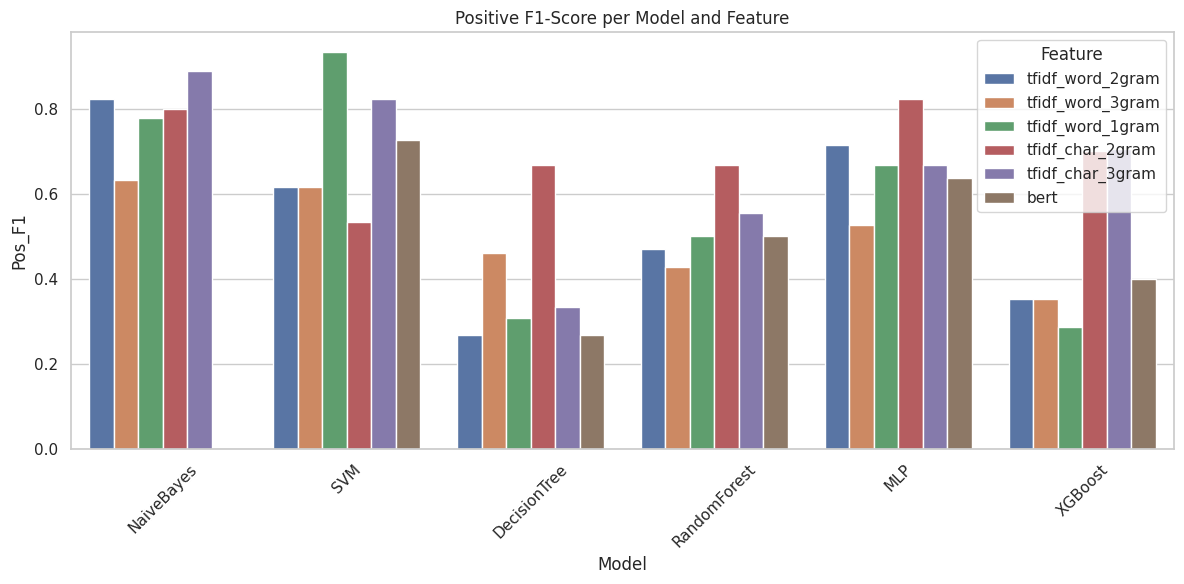

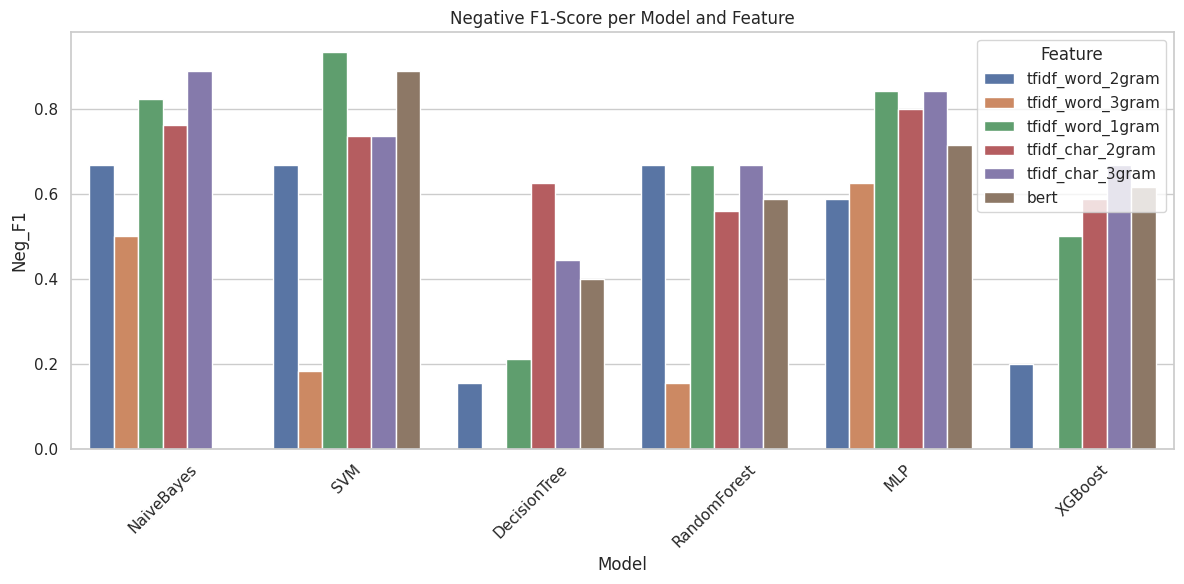

In [27]:
# Positive F1
plt.figure()
sns.barplot(data=df, x="Model", y="Pos_F1", hue="Feature")
plt.title("Positive F1-Score per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/positive_f1.png")
plt.show()

# Negative F1
plt.figure()
sns.barplot(data=df, x="Model", y="Neg_F1", hue="Feature")
plt.title("Negative F1-Score per Model and Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{REPORTS_PATH}/negative_f1.png")
plt.show()


# 6. Summary Tables: Average per-class performance per model

In [28]:
# Compute average per-class metrics
summary = df.groupby("Model")[[
    "Pos_Precision", "Neg_Precision",
    "Pos_Recall", "Neg_Recall",
    "Pos_F1", "Neg_F1",
    "Accuracy", "ErrorRate", "Weighted_F1"
]].mean().round(3)

# Show and save
summary.style.set_caption("Average Per-Class Metrics per Model").background_gradient(cmap="YlGnBu")
summary.to_csv(os.path.join(REPORTS_PATH, "per_class_model_summary.csv"))


# 7. Precision/Recall Balance Check

In [29]:
# Measure balance between positive and negative values
df["Precision_Diff"] = abs(df["Pos_Precision"] - df["Neg_Precision"])
df["Recall_Diff"] = abs(df["Pos_Recall"] - df["Neg_Recall"])

balance_df = df.groupby("Model")[["Precision_Diff", "Recall_Diff"]].mean().round(3)

# Display balance
balance_df.style.set_caption("Balance between Positive and Negative Precision/Recall").background_gradient(cmap="coolwarm")
balance_df.to_csv(os.path.join(REPORTS_PATH, "precision_recall_balance.csv"))

# Load CSVs

In [30]:
summary_path = "./../reports/per_class_model_summary.csv"
balance_path = "./../reports/precision_recall_balance.csv"

summary_df = pd.read_csv(summary_path, index_col=0)
balance_df = pd.read_csv(balance_path, index_col=0)

# Plot average metrics (Precision, Recall, F1)

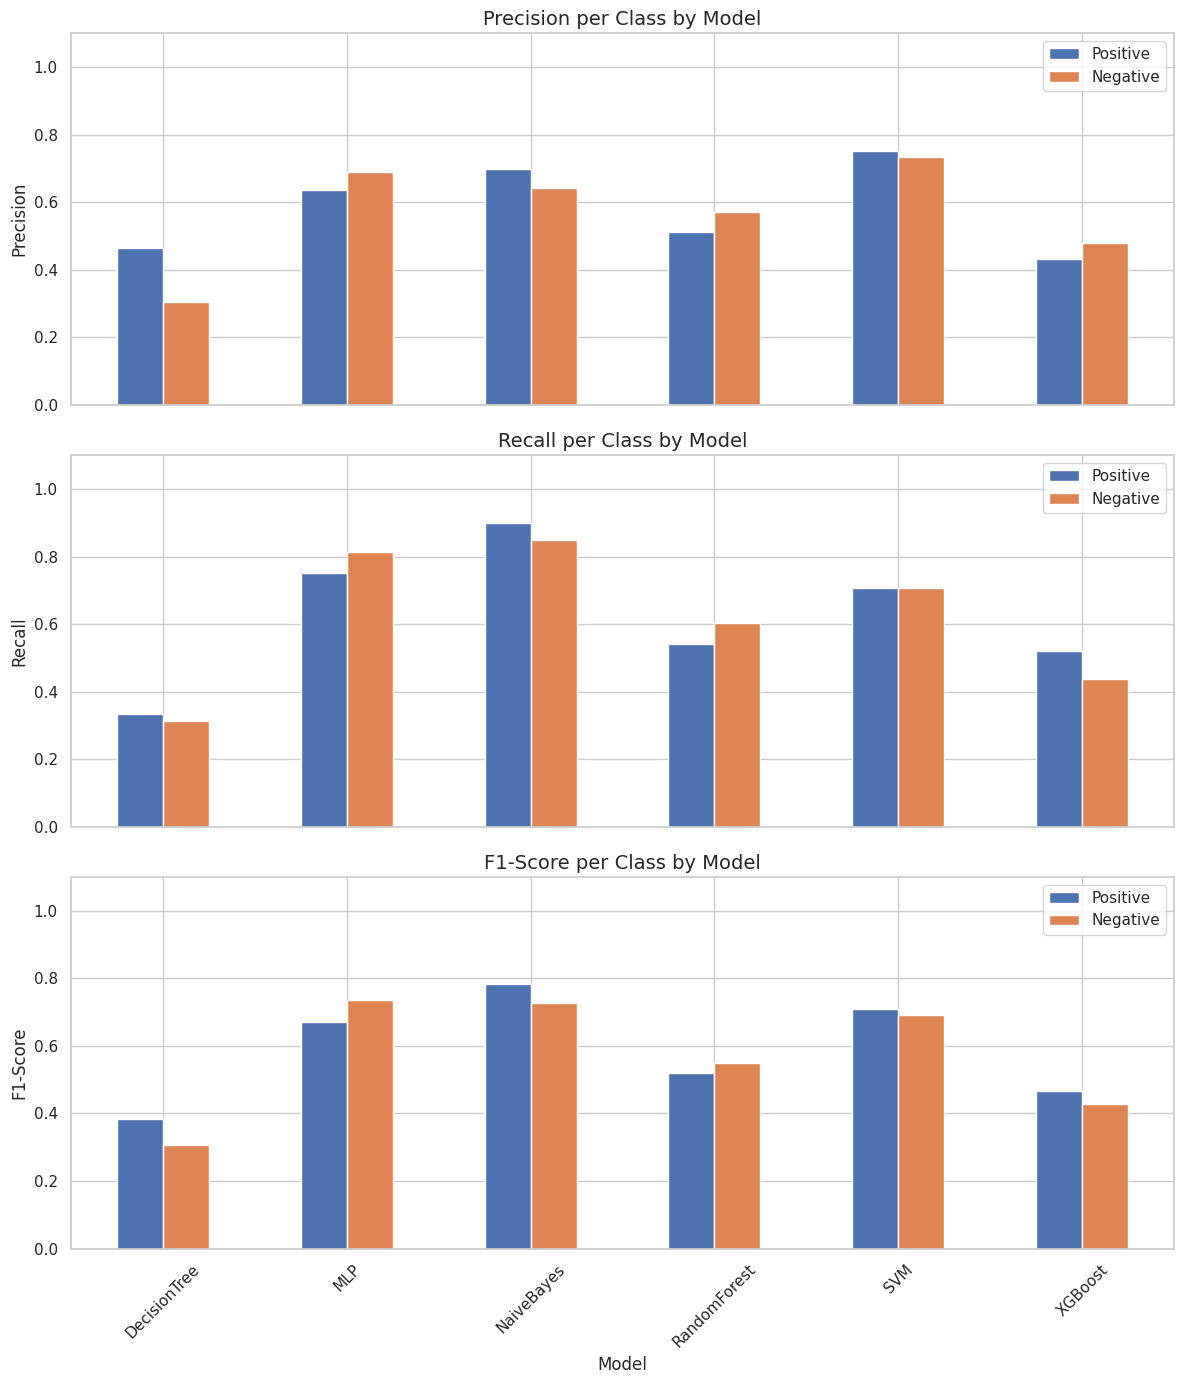

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

metrics = [("Precision", ["Pos_Precision", "Neg_Precision"]),
           ("Recall", ["Pos_Recall", "Neg_Recall"]),
           ("F1-Score", ["Pos_F1", "Neg_F1"])]

for i, (title, cols) in enumerate(metrics):
    summary_df[cols].plot.bar(ax=axes[i])
    axes[i].set_title(f"{title} per Class by Model", fontsize=14)
    axes[i].set_ylabel(title)
    axes[i].legend(["Positive", "Negative"])
    axes[i].set_ylim(0, 1.1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./../reports/per_class_metrics_barplot.png")
plt.show()


# Plot summary heatmap

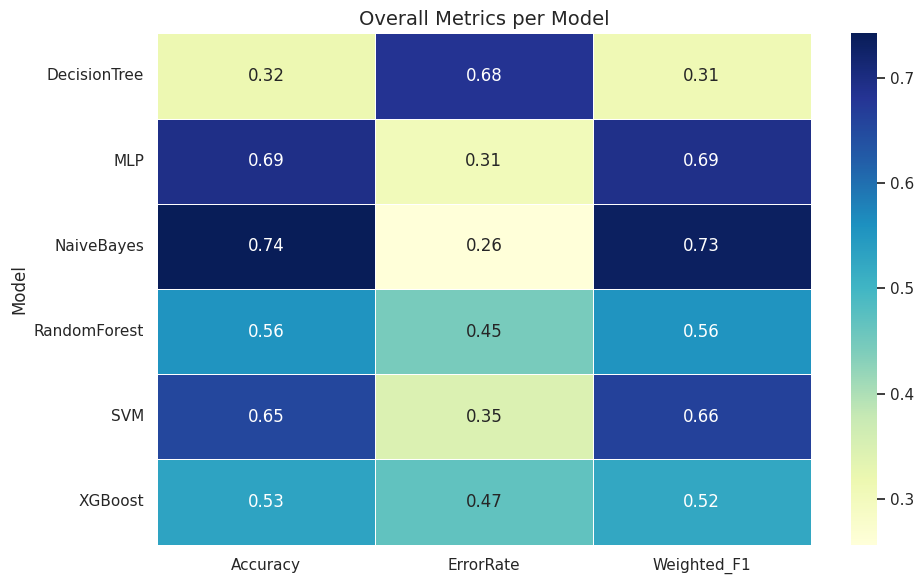

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(summary_df[["Accuracy", "ErrorRate", "Weighted_F1"]],
            annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Overall Metrics per Model", fontsize=14)
plt.tight_layout()
plt.savefig("./../reports/overall_metrics_heatmap.png")
plt.show()


# Balance Plot

<Figure size 1000x600 with 0 Axes>

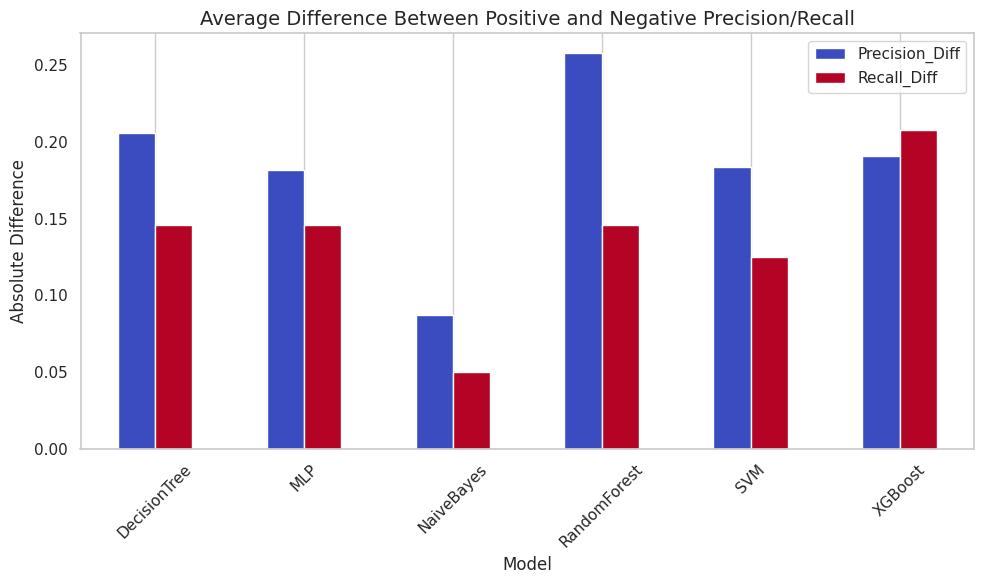

In [33]:
plt.figure(figsize=(10, 6))
balance_df.plot(kind="bar", rot=45, figsize=(10, 6), colormap="coolwarm")
plt.title("Average Difference Between Positive and Negative Precision/Recall", fontsize=14)
plt.ylabel("Absolute Difference")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("./../reports/precision_recall_balance_barplot.png")
plt.show()
